In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
import seaborn as sns

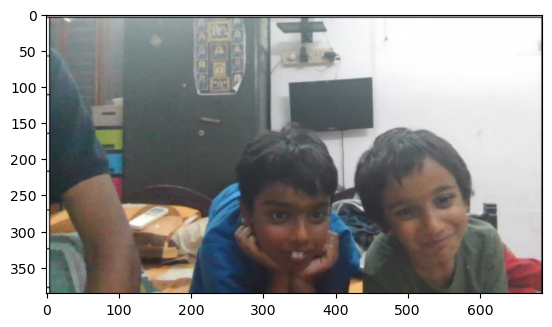

In [14]:
import imageio as iio

img = iio.imread("C:\\Users\\Badhri\\OneDrive\\Documents\\Screenshot 2023-04-13 193252.png")
plt.imshow(img)

In [18]:
#img = iio.imread("C:\\Users\\Badhri\\OneDrive\\Pictures\\Camera Roll\\WIN_20230330_14_09_14_Pro.jpg")
imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
img1=img.copy()
for i in range(imgYCC.shape[0]):
    for j in range(imgYCC.shape[1]):
        R= img[i,j,0]
        G=img[i,j,1]
        B=img[i,j,2]
        #A=img[i,j,3]
        Y= imgYCC[i,j,0]
        Cb=imgYCC[i,j,1]
        Cr=imgYCC[i,j,2]
        if (Cb>96.5 and Cb<142.5) and (Cr>134 and Cr<176):
            pass
        else:
            img1[i,j,:]=[0,0,0,255]
        if (R > 95) and (G > 40) and (B > 20) and (R > G) and (R > B) and (abs(R - G) > 15)  and (Cr > 135) and (Cb > 85) and (Y > 80) and (Cr <= (1.5862*Cb)+20) and (Cr>=(0.3448*Cb)+76.2069) and (Cr >= (-4.5652*Cb)+234.5652) and (Cr <= (-1.15*Cb)+301.75) and (Cr <= (-2.2857*Cb)+432.85):
            img[i,j,:]=[255,255,255,255]
            pass
        else:
            img[i,j,:]=[0,0,0,255]
    

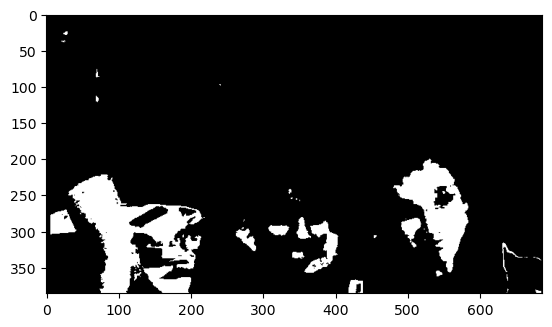

In [19]:
plt.imshow(img)

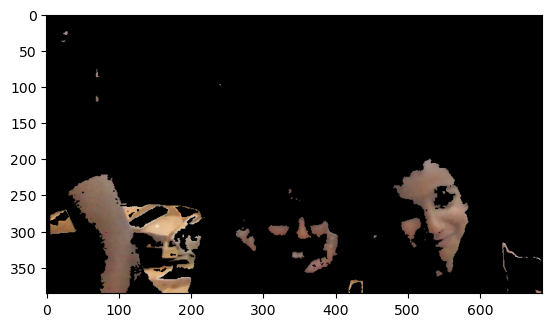

In [20]:
plt.imshow(img1)

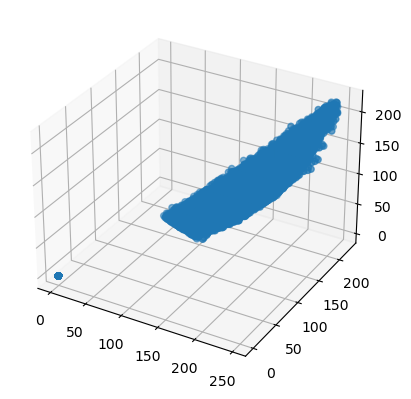

In [151]:
s_plot = plt.axes(projection='3d')
s_plot.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2],)

In [139]:
plt.show()

In [184]:
cb = imgYCC[:,:,1]
cr = imgYCC[:,:,2]

In [181]:
np.concatenate([cb,cr],axis=1)

array([[128, 126],
       [128, 127],
       [128, 128],
       ...,
       [123, 134],
       [122, 135],
       [120, 136]], dtype=uint8)

In [185]:
sum=0
for i in cb:
    sum+=i.sum()
cb_avg = (sum)/(cb.shape[0]*cb.shape[1])

In [186]:
sum=0
for i in cr:
    sum+=i.sum()
cr_avg = (sum)/(cr.shape[0]*cr.shape[1])

In [187]:
cb_ar = np.reshape(cb,(cb.shape[0]*cb.shape[1]))

In [188]:
cr_ar = np.reshape(cr,(cr.shape[0]*cr.shape[1]))

In [189]:
cov = np.cov(cb_ar,cr_ar)

In [190]:
cov_inv = np.linalg.inv(cov)

In [193]:
x = np.concatenate([np.reshape(cb_ar,(-1,1)),np.reshape(cr_ar,(-1,1))],axis=1)

In [194]:
mean = [cb_avg,cr_avg]

In [202]:
first = np.reshape((x-mean),((x-mean).shape[1],(x-mean).shape[0]))

In [203]:
first.T@cov_inv@first

array([[ 3.3400665 , -6.56980978,  3.03724945, ...,  0.50180758,
        -1.70982745,  2.14280239],
       [-6.56980978, 12.94937209, -5.98891297, ..., -1.03286853,
         3.32579459, -4.23289063],
       [ 3.03724945, -5.98891297,  2.77000172, ...,  0.48155238,
        -1.53422187,  1.95847987],
       ...,
       [ 0.50180758, -1.03286853,  0.48155238, ...,  0.15388943,
        -0.19284739,  0.35287217],
       [-1.70982745,  3.32579459, -1.53422187, ..., -0.19284739,
         0.92752145, -1.07169159],
       [ 2.14280239, -4.23289063,  1.95847987, ...,  0.35287217,
        -1.07169159,  1.38689881]])

In [204]:
first.shape

(2, 61230)

In [205]:
cov_inv.shape

(2, 2)